In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd

vocab_size = 4000
embedding_dim = 16
max_length = 120
training_size = 49000
oov_tok = "<OOV>"
trunc_type = 'post'
padding_type = 'post'

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
df = pd.read_csv("/content/drive/My Drive/2020-2021 RNN Contest/Data/train.csv")
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,lyric,class
0,Can't drink without thinkin' about you,1
1,Now Lil Pump flyin' private jet (Yuh),0
2,"No, matter fact, you ain't help me when I had ...",0
3,"And you could find me, I ain't hidin'",0
4,From the way you talk to the way you move,1
...,...,...
51049,"I told her pour me some more, then she went ri...",0
51050,Hit the ground and crawl to the dresser,0
51051,Just keep breathin' and breathin' and breathin...,1
51052,"Down go the system, long live the king (King)",0


In [ ]:
punctuation = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
def remove_punct(text):
  no_punc = ""
  for char in text:
    if char not in punctuation:
        no_punc = no_punc + char
  return no_punc

In [ ]:
lyrics = np.array(df['lyric'])
labels = np.array(df['class'])

# for i in range(len(lyrics)):
#   lyrics[i] = remove_punct(lyrics[i])

print("# Lyrics: " + str(len(lyrics)))

print("# Rap Songs: " + str(np.count_nonzero(df['class'] == 0)))
print("# Rap Songs: " + str(np.count_nonzero(df['class'] == 1)))

training_lyrics = lyrics[0:training_size]
validation_lyrics = lyrics[training_size:]
training_labels = labels[0:training_size]
validation_labels = labels[training_size:]

# Lyrics: 51054
# Rap Songs: 28885
# Rap Songs: 22169


In [ ]:
tokenizer = Tokenizer(num_words=vocab_size,oov_token=oov_tok)
tokenizer.fit_on_texts(training_lyrics)

word_index = tokenizer.word_index

In [ ]:
print(word_index)

{'<OOV>': 1, 'i': 2, 'you': 3, 'the': 4, 'a': 5, 'me': 6, 'my': 7, 'it': 8, 'to': 9, 'and': 10, 'yeah': 11, "i'm": 12, 'on': 13, 'in': 14, 'that': 15, 'like': 16, 'up': 17, "don't": 18, 'with': 19, 'know': 20, 'we': 21, 'your': 22, 'no': 23, 'got': 24, 'all': 25, 'for': 26, 'be': 27, 'of': 28, 'but': 29, 'just': 30, 'love': 31, 'n': 32, 'get': 33, 's': 34, 'she': 35, 'so': 36, 'b': 37, 'they': 38, 'this': 39, "it's": 40, 'when': 41, "ain't": 42, 'oh': 43, 'go': 44, 'f': 45, 'is': 46, 'out': 47, 'what': 48, 'do': 49, 'if': 50, 'now': 51, 'baby': 52, 'can': 53, 'her': 54, 'was': 55, "can't": 56, 'wanna': 57, 'back': 58, 'want': 59, 'down': 60, "'cause": 61, 'let': 62, 'never': 63, 'say': 64, 'make': 65, 'one': 66, 'at': 67, 'not': 68, 'how': 69, 'time': 70, 'need': 71, "that's": 72, 'tell': 73, 'from': 74, 'been': 75, 'he': 76, 'take': 77, "you're": 78, 'see': 79, 'ooh': 80, 'keep': 81, 'way': 82, 'too': 83, 'off': 84, "gon'": 85, 'these': 86, 'ayy': 87, 'right': 88, 'feel': 89, 'some': 

In [ ]:
training_sequences = tokenizer.texts_to_sequences(training_lyrics)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(training_sequences[0])

validation_sequences = tokenizer.texts_to_sequences(validation_lyrics)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

[56, 453, 303, 409, 123, 3]


In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
  # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(1)
])
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 120, 16)           64000     
_________________________________________________________________
bidirectional_20 (Bidirectio (None, 64)                12544     
_________________________________________________________________
dense_32 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_13 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 65        
Total params: 80,769
Trainable params: 80,769
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 10
x = np.array(training_padded)
y = np.array(training_labels)
validation_padded = np.array(validation_padded)
validation_labels = np.array(validation_labels)

In [ ]:
history = model.fit(x, y, epochs=num_epochs, validation_data=(validation_padded, validation_labels))

Epoch 1/10
1532/1532 [==============================] - 22s 12ms/step - loss: 0.6592 - accuracy: 0.6788 - val_loss: 0.4444 - val_accuracy: 0.7931
Epoch 2/10
1532/1532 [==============================] - 18s 12ms/step - loss: 0.4866 - accuracy: 0.7897 - val_loss: 0.5114 - val_accuracy: 0.7011
Epoch 3/10
1532/1532 [==============================] - 18s 12ms/step - loss: 0.4700 - accuracy: 0.8127 - val_loss: 0.4497 - val_accuracy: 0.8247
Epoch 4/10
1532/1532 [==============================] - 18s 12ms/step - loss: 0.4790 - accuracy: 0.7798 - val_loss: 0.4709 - val_accuracy: 0.8174
Epoch 5/10
1532/1532 [==============================] - 18s 12ms/step - loss: 0.4528 - accuracy: 0.8279 - val_loss: 0.5820 - val_accuracy: 0.6782
Epoch 6/10
1532/1532 [==============================] - 18s 12ms/step - loss: 0.4448 - accuracy: 0.8193 - val_loss: 0.5417 - val_accuracy: 0.8092
Epoch 7/10
1532/1532 [==============================] - 18s 12ms/step - loss: 0.4352 - accuracy: 0.8265 - val_loss: 0.5021 -

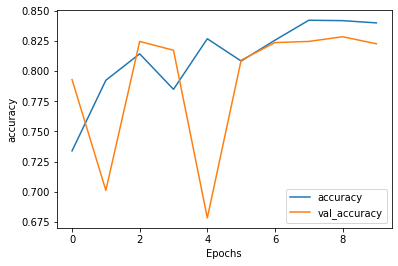

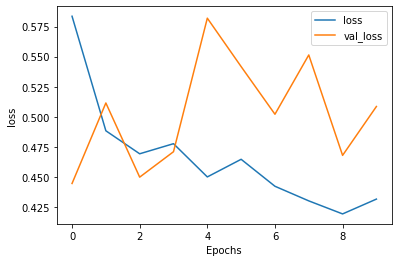

In [ ]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
df_test = pd.read_csv('/content/drive/My Drive/2020-2021 RNN Contest/Data/test.csv')
lyrics =df_test['lyric']

testing_sequences = (tokenizer.texts_to_sequences(lyrics))
testing_padded = np.array(pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type))

vfunc = np.vectorize(lambda x: 1 if x >=0.5 else 0)
labels = vfunc(model.predict(testing_padded))
df_test.insert(2, "class", labels, True)

In [ ]:
df_test

,id,lyric,class
0,0,Now they know my name wherever I go,1
1,1,"If your girl don't get it poppin', put me on y...",0
2,2,"P1 cleaner than your church shoes, ah",0
3,3,"Bodies start to drop, ayy (Hit the floor)",1
4,4,I don't look to the sky no mo',0
...,...,...,...
2671,2671,"So tell me, how deep is your love?",1
2672,2672,If this is all we're living for,1
2673,2673,"I'll never let up on the pedal, might as well ...",0
2674,2674,"Turned my temple down into a prison, s***",0


In [ ]:
submission = df_test[['id','class']]
submission.to_csv('/content/drive/My Drive/2020-2021 RNN Contest/Data/submission.csv', index=False)
submission

,id,class
0,0,1
1,1,0
2,2,0
3,3,1
4,4,0
...,...,...
2671,2671,1
2672,2672,1
2673,2673,0
2674,2674,0
